(1) 1 주차 과제 의 데이터를 가지고 선형회귀에 필요한 EDA 및 전처리 및 인코딩
-
범주형 변수 인코딩 3 개 이상 , EDA 3 개 이상
* 1주차 과제 적극적으로 활용 가능 및 자신이 만든 Feature 역시 사용 가능

(2)선형회귀분석을 배웠으니 1 주차 데이터를 다양한 방식으로 선형회귀분석 ! (Target: Hammer price)

(3)적합된 회귀식에 대해 데이터의 행렬을 통해 < MSE > 구하여 위의 값과 비교 (24 25 참고
* (3)번의 경우 , sklearn 을 사용하지 않고 행렬을 통해 값 추출하기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Pandas 출력 최대치 설정, 열41개, 행 20개
pd.set_option('max_columns', 41,'max_rows', 20) 

In [3]:
df = pd.read_csv('Auction_master_train.csv')
df.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_li,addr_san,addr_bunji1,addr_bunji2,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13 00:00:00,2018-03-20 00:00:00,낙찰,베리타스자산관리대부,부산,해운대구,우동,NaN,N,1398.0,NaN,해운대엑소디움 5층 101-502호,주상복합,2009-07-14 00:00:00,45,5,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29 00:00:00,2017-02-02 00:00:00,낙찰,흥국저축은행,부산,해운대구,우동,NaN,N,1407.0,NaN,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16 00:00:00,70,51,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28 00:00:00,2017-10-13 00:00:00,낙찰,국민은행,부산,사상구,모라동,NaN,N,552.0,NaN,백양그린 206동 14층 1403호,아파트,1992-07-31 00:00:00,15,14,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20 00:00:00,2017-11-02 00:00:00,낙찰,고려저축은행,부산,남구,대연동,NaN,N,243.0,23.0,대연청구 109동 11층 1102호,아파트,2001-07-13 00:00:00,20,11,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06 00:00:00,2016-08-03 00:00:00,낙찰,Private,부산,사하구,괴정동,NaN,N,399.0,2.0,동조리젠시 7층 703호,아파트,2001-11-27 00:00:00,7,7,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


In [4]:
# 데이터 구조 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 41 columns):
Auction_key                    1933 non-null int64
Auction_class                  1933 non-null object
Bid_class                      1933 non-null object
Claim_price                    1933 non-null int64
Appraisal_company              1933 non-null object
Appraisal_date                 1933 non-null object
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
First_auction_date             1933 non-null object
Final_auction_date             1933 non-null object
Final_resu

In [5]:
#결측치 있는 열 확인 (덧셈은 행들의 값을 더해야하니까 axis=0)
df.isnull().sum(axis=0)

Auction_key                     0
Auction_class                   0
Bid_class                       0
Claim_price                     0
Appraisal_company               0
Appraisal_date                  0
Auction_count                   0
Auction_miscarriage_count       0
Total_land_gross_area           0
Total_land_real_area            0
                             ... 
Specific                     1869
Share_auction_YorN              0
road_name                       0
road_bunji1                    24
road_bunji2                  1778
Close_date                      0
Close_result                    0
point.y                         0
point.x                         0
Hammer_price                    0
Length: 41, dtype: int64

In [6]:
# 결측값이 있는 모든 열을 제거 
# 결측치가 제거된 데이터를 df_delete에 집어넣음.
df = df.dropna(axis=1)

In [7]:
#격측값이 있는 열이 다 제거된 것을 볼수 있음.
df.isnull().sum(axis=0)

Auction_key                  0
Auction_class                0
Bid_class                    0
Claim_price                  0
Appraisal_company            0
Appraisal_date               0
Auction_count                0
Auction_miscarriage_count    0
Total_land_gross_area        0
Total_land_real_area         0
                            ..
Preserve_regist_date         0
Total_floor                  0
Current_floor                0
Share_auction_YorN           0
road_name                    0
Close_date                   0
Close_result                 0
point.y                      0
point.x                      0
Hammer_price                 0
Length: 35, dtype: int64

### Encoding

In [8]:
df.Auction_class.value_counts()

임의    1439
강제     494
Name: Auction_class, dtype: int64

In [9]:
def encoding (x):
    if x == '임의':
        return 1
    else:
        return 0

In [10]:
df.Auction_class = df.Auction_class.apply(encoding)

In [11]:
df.Auction_class.value_counts()

1    1439
0     494
Name: Auction_class, dtype: int64

In [12]:
def transform(x):
    if x == '배당':
        return 1
    else:
        return 0

In [13]:
df['Close_result'] = df['Close_result'].apply(transform)

In [14]:
# 판정가(Total_appraisal_price) 와 hammer_price 의 차이
# 감정가격보다 얼마나 더 이득을 얻었는지
df['Gain']= df['Total_appraisal_price']-df['Hammer_price']

In [15]:
# 이득의 정도를 + 면 1 - 면 0으로 나타내보자.

def transform_to_number(x):
    if x > 0:
        return 1
    else:
        return 0
    
df['gain_or_loss'] = df['Gain'].apply(transform_to_number)

In [16]:
df.Bid_class.value_counts()

일반    1796
개별     125
일괄      12
Name: Bid_class, dtype: int64

In [17]:
def encoding2 (x):
    if x == '일반':
        return 1
    elif x== '개별':
        return 2
    else:
        return 0

In [18]:
df['Bid_class']=df['Bid_class'].apply(encoding2)

In [19]:
# 최종경매일과 최초 경매일 일수의 차이를 보고싶었다
# 일수가 높다는것은 잘 안팔렸다는것이 아닐까!

df['date'] = pd.to_datetime(df.Final_auction_date)-pd.to_datetime(df.First_auction_date)
df.date = df.date.apply(lambda x: int(str(x).split(' ')[0]))

In [20]:
# 연도를 추출해보자.
# 연도별로 어떤 경향을 보일수도 있을거라 생각했다.

df['year'] = pd.DatetimeIndex(df['Final_auction_date']).year

In [21]:
df.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_san,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,road_name,Close_date,Close_result,point.y,point.x,Hammer_price,Gain,gain_or_loss,date,year
0,2687,1,2,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13 00:00:00,2018-03-20 00:00:00,낙찰,베리타스자산관리대부,부산,해운대구,우동,N,해운대엑소디움 5층 101-502호,주상복합,2009-07-14 00:00:00,45,5,N,해운대해변로,2018-06-14 00:00:00,1,35.162717,129.137048,760000000,76000000,1,35,2018
1,2577,1,1,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29 00:00:00,2017-02-02 00:00:00,낙찰,흥국저축은행,부산,해운대구,우동,N,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16 00:00:00,70,51,N,마린시티2로,2017-03-30 00:00:00,1,35.156633,129.145068,971889999,101110001,1,35,2017
2,2197,1,2,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28 00:00:00,2017-10-13 00:00:00,낙찰,국민은행,부산,사상구,모라동,N,백양그린 206동 14층 1403호,아파트,1992-07-31 00:00:00,15,14,N,모라로110번길,2017-12-13 00:00:00,1,35.184601,128.996765,93399999,25600001,1,77,2017
3,2642,1,1,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20 00:00:00,2017-11-02 00:00:00,낙찰,고려저축은행,부산,남구,대연동,N,대연청구 109동 11층 1102호,아파트,2001-07-13 00:00:00,20,11,N,황령대로319번가길,2017-12-27 00:00:00,1,35.154180,129.089081,256899000,31501000,1,105,2017
4,1958,0,1,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06 00:00:00,2016-08-03 00:00:00,낙찰,Private,부산,사하구,괴정동,N,동조리젠시 7층 703호,아파트,2001-11-27 00:00:00,7,7,N,오작로,2016-10-04 00:00:00,1,35.099630,128.998874,158660000,11340000,1,28,2016


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 39 columns):
Auction_key                    1933 non-null int64
Auction_class                  1933 non-null int64
Bid_class                      1933 non-null int64
Claim_price                    1933 non-null int64
Appraisal_company              1933 non-null object
Appraisal_date                 1933 non-null object
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
First_auction_date             1933 non-null object
Final_auction_date             1933 non-null object
Final_result

### EDA

In [28]:
X = df.drop('Hammer_price', axis=1)
X = X.drop('Close_result', axis=1)
X = X.drop('Appraisal_company' ,axis=1)
X = X.drop('Appraisal_date', axis=1)

X = X.drop('First_auction_date',axis=1)           
X = X.drop('Final_auction_date' ,axis=1)            
X = X.drop('Final_result',axis=1)
X = X.drop('Creditor',axis=1)
X = X.drop('addr_do',axis=1)
X = X.drop('addr_si',axis=1)
X = X.drop('addr_dong',axis=1)
X = X.drop('addr_san',axis=1)
X = X.drop('addr_etc',axis=1)
X = X.drop('Apartment_usage',axis=1)
X = X.drop('Preserve_regist_date',axis=1) 
X = X.drop('Share_auction_YorN',axis=1)
X = X.drop('road_name',axis=1)
X = X.drop('Close_date',axis=1)
y = df.Hammer_price

In [23]:
X.shape, y.shape

((1933, 24), (1933,))

In [24]:
X.corr()

,Auction_key,Auction_class,Bid_class,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,Total_floor,Current_floor,point.y,point.x,Gain,gain_or_loss,date,year
Auction_key,1.000000,-0.015034,-0.016725,-0.136286,-0.020529,-0.013011,-0.021237,-0.099446,-0.093441,-0.126003,-0.117179,-0.322892,-0.403807,0.142475,0.097703,-0.812046,0.828253,-0.067938,0.060887,-0.107605,0.171891
Auction_class,-0.015034,1.000000,-0.128420,0.052025,-0.064498,-0.067789,0.045935,0.005182,0.021547,0.013988,0.035694,0.031005,0.054143,0.090146,0.015933,0.031377,-0.034449,-0.020065,0.040606,-0.055180,0.008709
Bid_class,-0.016725,-0.128420,1.000000,0.233687,0.151884,0.160280,-0.055316,-0.161695,-0.158624,-0.148806,-0.144568,-0.138715,-0.143433,-0.100746,-0.019175,-0.000615,-0.003108,-0.091780,0.043610,0.192565,-0.055667
Claim_price,-0.136286,0.052025,0.233687,1.000000,0.013312,0.015411,0.003771,0.180421,0.182207,0.202379,0.204000,0.248846,0.261076,0.016466,0.043258,0.095939,-0.103605,0.152523,-0.033063,0.033575,-0.014411
Auction_count,-0.020529,-0.064498,0.151884,0.013312,1.000000,0.972918,-0.045697,0.062824,0.062868,0.107074,0.104286,0.071038,-0.036716,-0.052329,-0.029124,-0.054074,0.051634,0.213662,0.565895,0.534243,0.002489
Auction_miscarriage_count,-0.013011,-0.067789,0.160280,0.015411,0.972918,1.000000,-0.050457,0.069582,0.069392,0.118290,0.114779,0.077547,-0.033039,-0.045343,-0.021852,-0.057197,0.054032,0.220017,0.615626,0.523034,0.008060
Total_land_gross_area,-0.021237,0.045935,-0.055316,0.003771,-0.045697,-0.050457,1.000000,0.049791,0.048225,0.017401,0.016474,0.041896,0.067135,0.100557,0.094385,0.014971,-0.014285,-0.020556,-0.030221,-0.028461,0.006965
Total_land_real_area,-0.099446,0.005182,-0.161695,0.180421,0.062824,0.069582,0.049791,1.000000,0.996224,0.940361,0.934759,0.842248,0.711515,-0.072543,-0.062673,0.060602,-0.062621,0.898717,0.039168,0.022773,-0.014806
Total_land_auction_area,-0.093441,0.021547,-0.158624,0.182207,0.062868,0.069392,0.048225,0.996224,1.000000,0.938144,0.941681,0.845243,0.715891,-0.068385,-0.061274,0.055776,-0.057796,0.898152,0.039020,0.024420,-0.019172
Total_building_area,-0.126003,0.013988,-0.148806,0.202379,0.107074,0.118290,0.017401,0.940361,0.938144,1.000000,0.993533,0.900302,0.783299,0.107069,0.071110,0.062797,-0.064572,0.916278,0.092751,0.061207,-0.022744


In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 24 columns):
Auction_key                    1933 non-null int64
Auction_class                  1933 non-null int64
Bid_class                      1933 non-null int64
Claim_price                    1933 non-null int64
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
Total_floor                    1933 non-null int64
Current_floor                  1933 non-null int64
Share_auction_YorN             1933 non-null object
road_name                      1933 non-null object
Close_date    

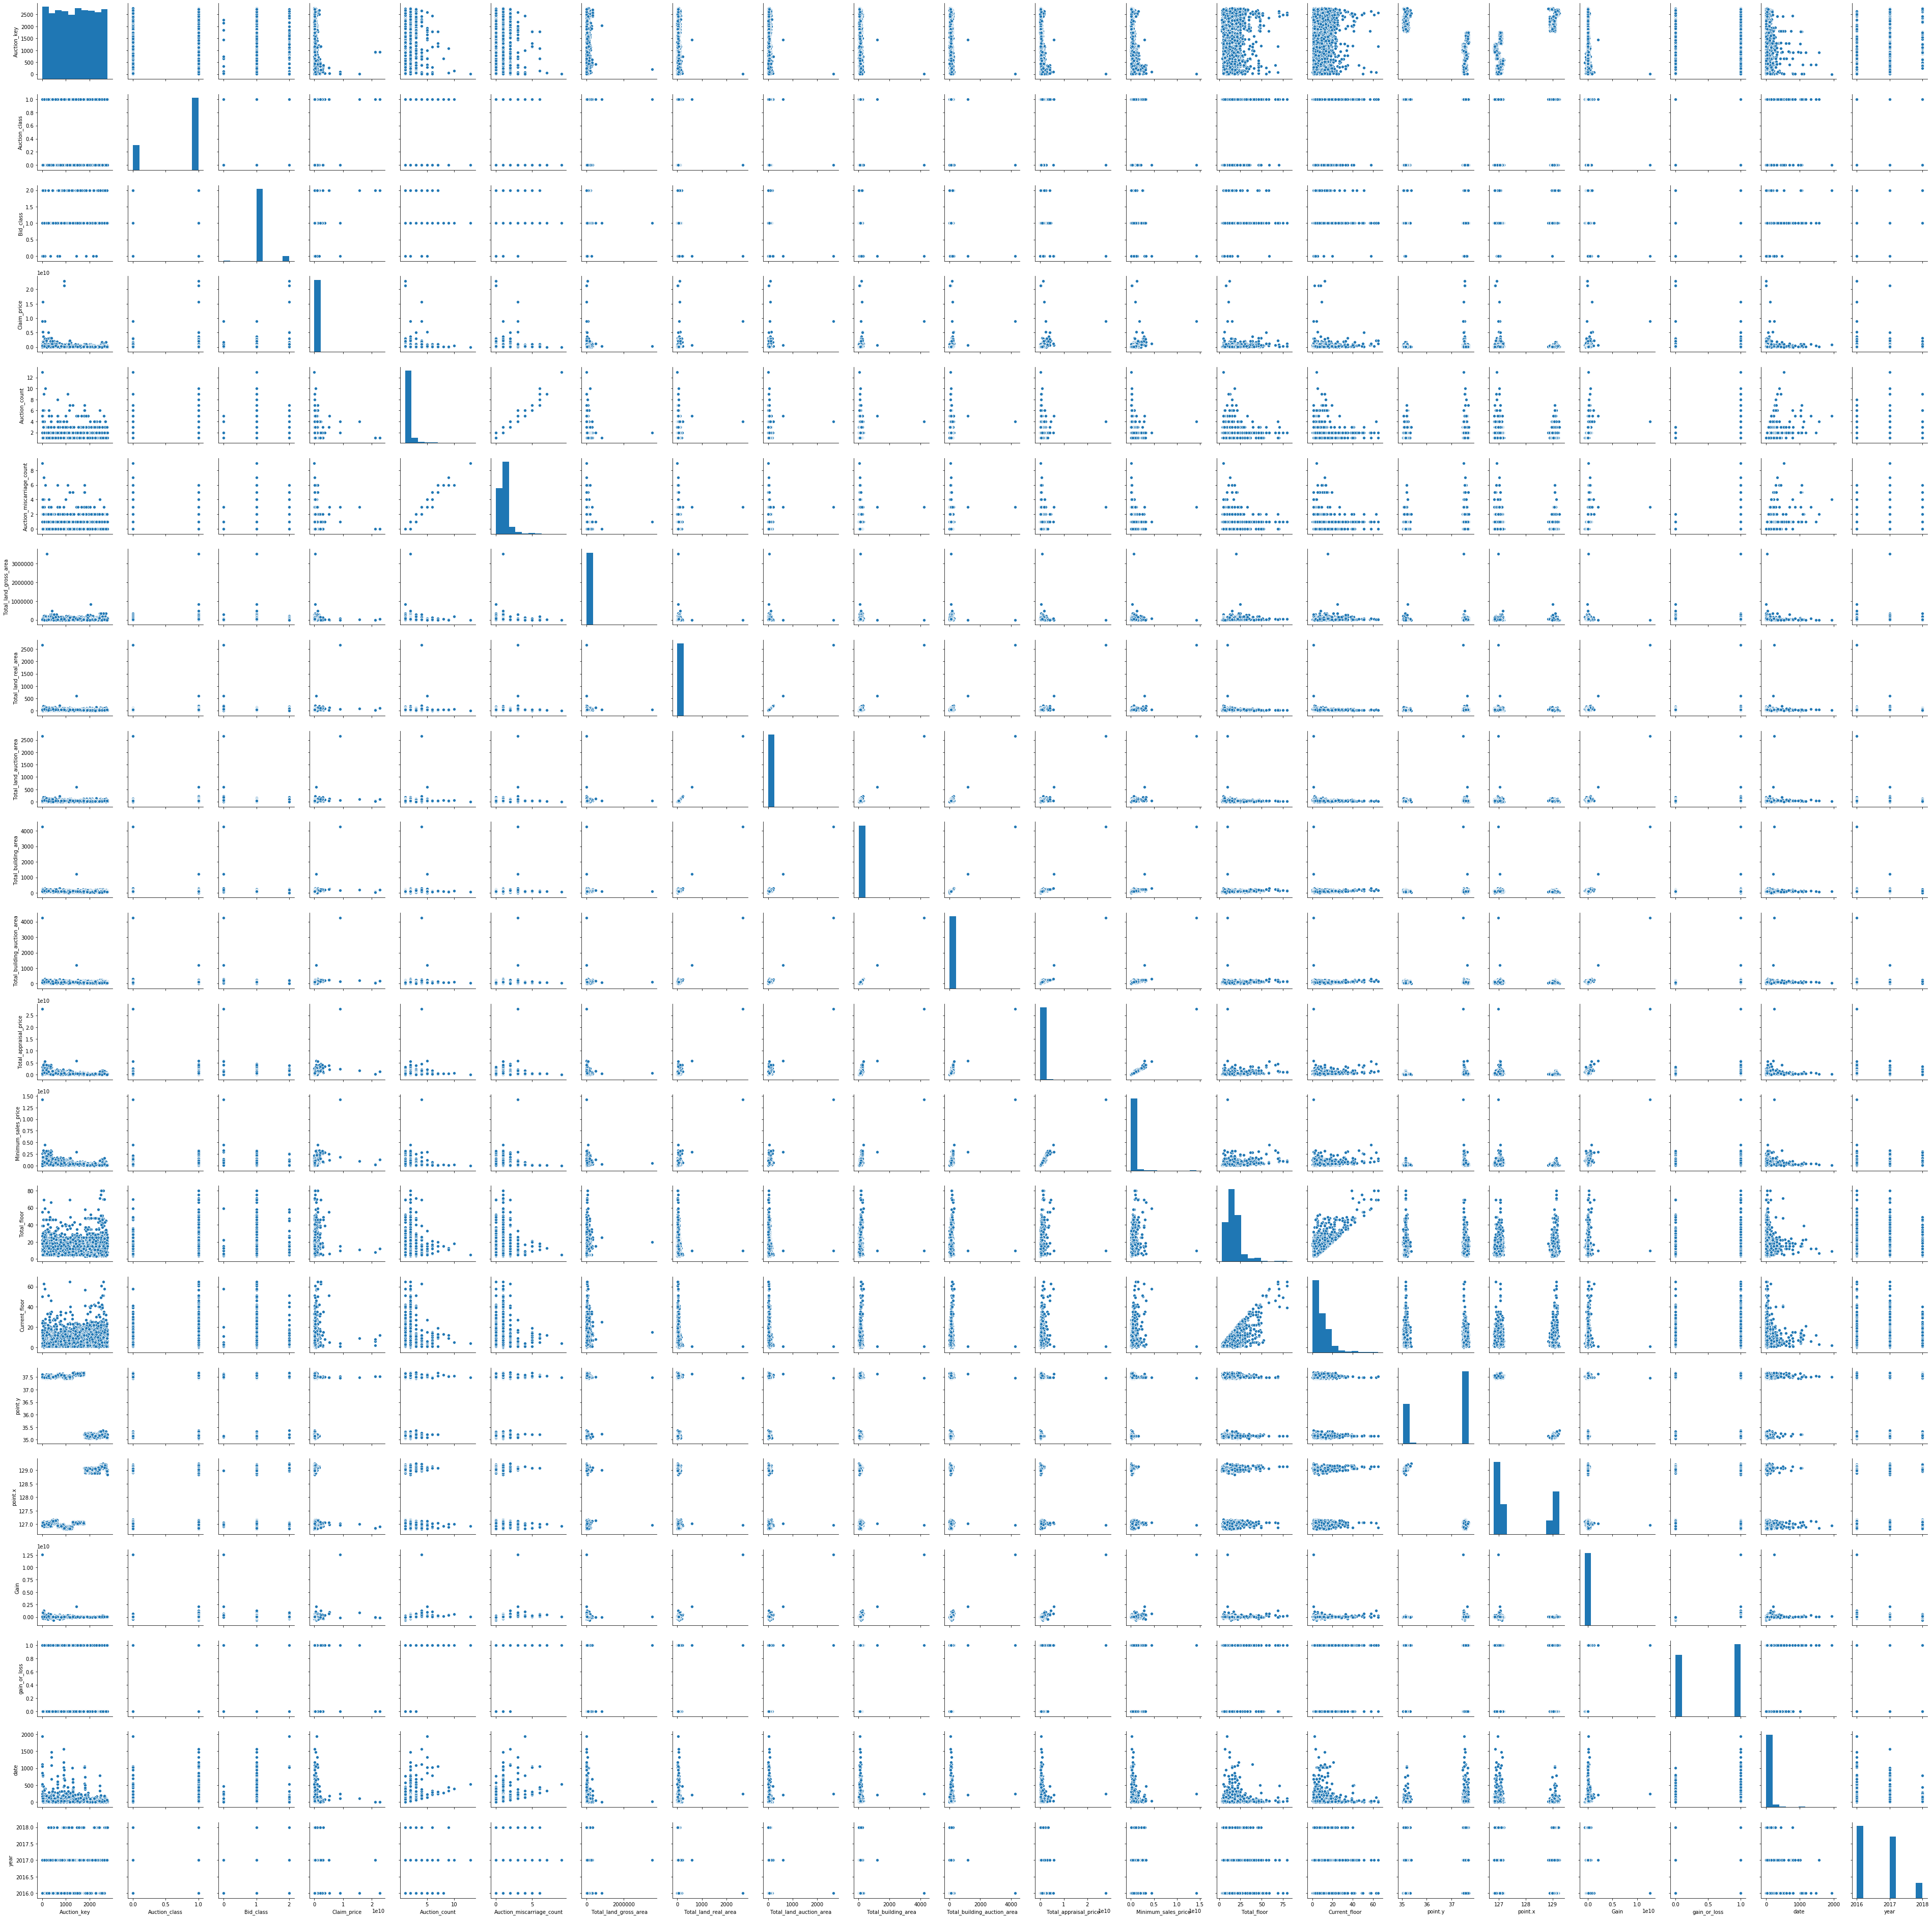

In [26]:
sns.pairplot(X)

13,14 번째랑 5,6 번째 상관관계 높게 나왔다.

In [29]:
#VIF확인하기
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])


,VIF Factor,features
8,954.693009,Total_land_auction_area
7,934.927382,Total_land_real_area
10,565.286994,Total_building_auction_area
9,548.490879,Total_building_area
11,261.252068,Total_appraisal_price
12,135.288044,Minimum_sales_price
16,73.330401,point.x
15,70.289107,point.y
17,32.458694,Gain
5,22.237890,Auction_miscarriage_count


: 다중공선성이 있다고 판단되는 변수들
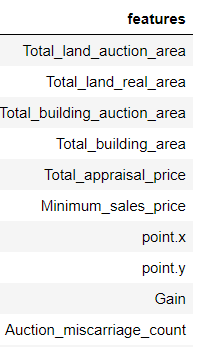

## 2. 선형회귀분석

In [30]:
# train, test data 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
from sklearn.linear_model import LinearRegression

#모델 불러옴
model = LinearRegression()
#train data에 fit시킴
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
#fit된 모델의 R-square
model.score(X_train, y_train)

1.0

In [34]:
print(model.coef_) #추정된 회귀계수(intercept제외)
print(model.intercept_) #intercept

[ 8.63922278e-11  6.43275694e-08  5.02345452e-07  4.92614714e-17
  3.03280043e-08 -3.30899045e-08 -1.21504456e-13  2.02633746e-08
 -1.15942747e-08 -8.14087865e-09  1.15615856e-08  1.00000000e+00
  1.76229138e-15 -6.77247296e-09  9.81921278e-09  1.72790960e-07
  2.23804998e-07 -1.00000000e+00  4.70205938e-08 -3.66007857e-11
  2.79632514e-08]
-9.268522262573242e-05


In [35]:
#test데이터 예측
model.predict(X_test)

array([4.02000000e+08, 7.45600000e+08, 1.38010000e+08, 2.95110000e+08,
       7.51600000e+08, 6.60000000e+07, 6.30418509e+08, 3.51700000e+08,
       1.05000000e+09, 4.28009900e+08, 6.37000000e+08, 1.96998895e+08,
       6.60000000e+08, 3.31000000e+08, 9.01230000e+07, 2.73333333e+08,
       8.60000000e+07, 1.33000000e+08, 8.03555555e+08, 1.20000000e+09,
       4.56670000e+08, 2.23755000e+08, 1.85200000e+09, 2.44440000e+08,
       1.35474000e+08, 1.40010000e+08, 5.81100000e+08, 9.36000100e+08,
       3.91222220e+08, 4.21488000e+07, 1.07401000e+09, 3.58000000e+08,
       2.92666000e+08, 7.00570000e+08, 5.49999999e+08, 3.02810000e+08,
       5.49990000e+08, 2.75599999e+08, 5.64299999e+08, 4.85217000e+08,
       8.82100000e+08, 4.05000000e+07, 3.13765000e+08, 2.31700000e+07,
       4.03010000e+08, 9.60000000e+08, 1.73711110e+08, 1.42769599e+09,
       4.20000000e+08, 3.28500000e+08, 8.31999000e+08, 1.07897000e+09,
       1.18400000e+08, 2.89800000e+08, 7.90000000e+08, 1.97000000e+08,
      

In [42]:
#test데이터 R-square
model.score(X_test, y_test)

1.0

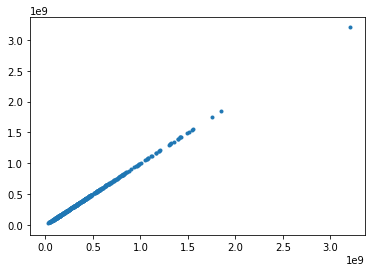

In [43]:
# 예측 vs. 실제데이터 plot
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

In [44]:
#Ridge, Lasso 회귀
from sklearn.linear_model import Ridge, Lasso

ridge=Ridge(alpha=1.0)#alpha: 얼마나 정규화를 할건지 정하는 양수 하이퍼파라미터 (클수록 더 정규화)
ridge.fit(X_train, y_train)

C:\Users\MiSung\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.96585e-21): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [45]:
ridge.get_params

<bound method BaseEstimator.get_params of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)>

In [46]:
#R-square
ridge.score(X_train,y_train)

1.0

In [47]:
ridge=Ridge(alpha=0.3)
ridge.fit(X_train, y_train)
ridge.score(X_train,y_train)

C:\Users\MiSung\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.75707e-21): result may not be accurate.
  overwrite_a=True).T


1.0

In [48]:
#Lasso
lasso=Lasso(alpha=0.3)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

0.9999999401856429

In [50]:
df.columns

Index(['Auction_key', 'Auction_class', 'Bid_class', 'Claim_price',
       'Appraisal_company', 'Appraisal_date', 'Auction_count',
       'Auction_miscarriage_count', 'Total_land_gross_area',
       'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'First_auction_date',
       'Final_auction_date', 'Final_result', 'Creditor', 'addr_do', 'addr_si',
       'addr_dong', 'addr_san', 'addr_etc', 'Apartment_usage',
       'Preserve_regist_date', 'Total_floor', 'Current_floor',
       'Share_auction_YorN', 'road_name', 'Close_date', 'Close_result',
       'point.y', 'point.x', 'Hammer_price', 'Gain', 'gain_or_loss', 'date',
       'year'],
      dtype='object')

## 3. MSE구하기
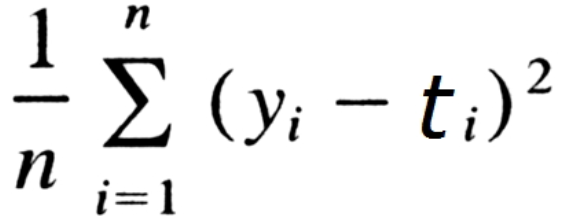

In [39]:
#MSE
import sklearn as sk
sk.metrics.mean_squared_error(y_train, model.predict(X_train))

5.452982567878086e-13

In [40]:
def mean_squared_error(y, t):
    return ((y-t)**2).mean(axis=None)


In [41]:
mean_squared_error(y_train, model.predict(X_train))

5.452982567878086e-13